In [7]:
import h5py
import numpy as np

In [8]:
    
def import_tfmodisco_motifs(tfm_results_path, trim_threshold, trim=True, only_pos=True):
	"""
	Imports the PFMs to into a dictionary, mapping `(x, y)` to the PFM,
	where `x` is the metacluster index and `y` is the pattern index.
	Arguments:
		`tfm_results_path`: path to HDF5 containing TF-MoDISco results
		`out_dir`: where to save motifs
		`trim`: if True, trim the motif flanks based on information content
		`only_pos`: if True, only return motifs with positive contributions
	Returns the dictionary of PFMs.
	""" 
    
	def trim_motif_new(cwm, motif, trim_threshold=0.3):
		"""
		Given the PFM and motif (both L x 4 arrays) (the motif could be the
		PFM itself), trims `motif` by cutting off flanks of low information
		content in `pfm`. `min_ic` is the minimum required information
		content. If specified this trimmed motif will be extended on either
		side by `pad` bases.
		If no base passes the `min_ic` threshold, then no trimming is done.
		"""

		score = np.sum(np.abs(cwm), axis=1)
		trim_thresh = np.max(score) * trim_threshold  # Cut off anything less than 30% of max score
		pass_inds = np.where(score >= trim_thresh)[0]
		trimmed = motif[np.min(pass_inds): np.max(pass_inds) + 1]

		if not trimmed.size:
			return motif

		return trimmed
    
	pfms = {}
	cfms = {}
	with h5py.File(tfm_results_path, "r") as f:
		metaclusters = f["metacluster_idx_to_submetacluster_results"]
		num_metaclusters = len(metaclusters.keys())
		for metacluster_i, metacluster_key in enumerate(metaclusters.keys()):
			metacluster = metaclusters[metacluster_key]
			if "patterns" not in metacluster["seqlets_to_patterns_result"]:
				continue
			patterns = metacluster["seqlets_to_patterns_result"]["patterns"]
			num_patterns = len(patterns["all_pattern_names"][:])
			for pattern_i, pattern_name in enumerate(patterns["all_pattern_names"][:]):
				#if pattern_i > 2:
				#	continue
				try:
					pattern_name = pattern_name.decode()
				except:
					pattern_name = pattern_name
				pattern = patterns[pattern_name]
				pfm = pattern["sequence"]["fwd"][:]
				cwm = pattern["task0_contrib_scores"]["fwd"][:]
				
				pfm = trim_motif_new(cwm, pfm, trim_threshold)
				cfm = trim_motif_new(cwm, cwm, trim_threshold)
				pfms["%d_%d" % (metacluster_i,pattern_i)] = pfm
				cfms["%d_%d" % (metacluster_i,pattern_i)] = cfm
	return pfms, cfms

In [9]:
ffms, cfms = import_tfmodisco_motifs("/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/ATAC/K562/modiscolite_crop_500_1M_seqs/modisco_results_allChroms_counts.hdf5", 0.3)

In [10]:
def _plot_weights(array,
                  figsize=(10,3),
                 **kwargs):
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111) 
    viz_sequence.plot_weights_given_ax(ax=ax, array=array,**kwargs)
    plt.show()
    plt.close()

In [12]:
import seqlogo
import pandas as pd
from modisco.visualization import viz_sequence
from modisco import util
from matplotlib import pyplot as plt

0_0


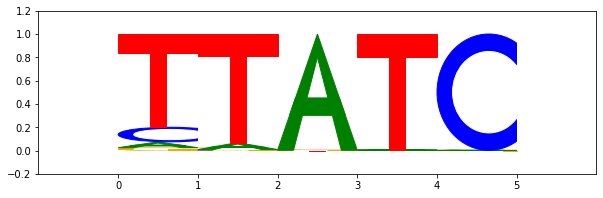

0_1


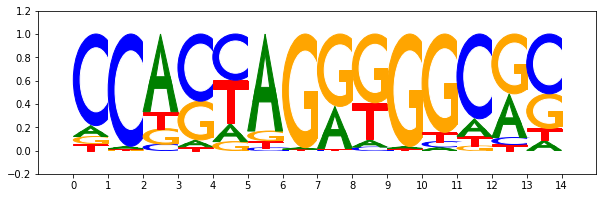

0_2


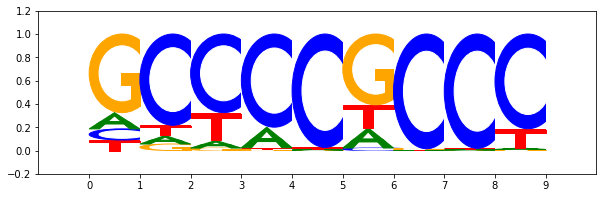

0_3


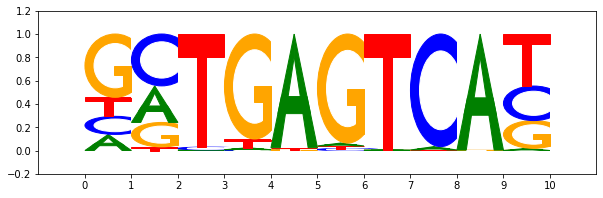

0_4


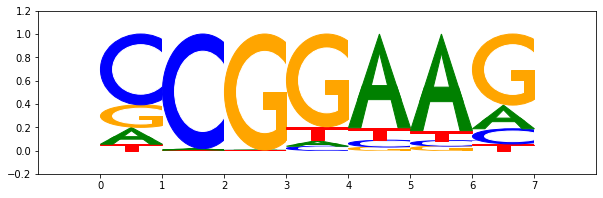

0_5


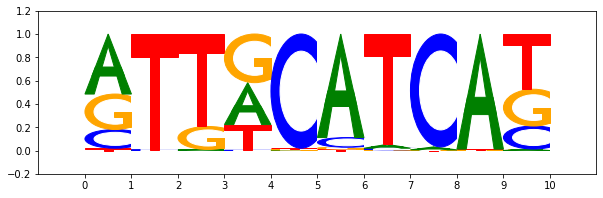

0_6


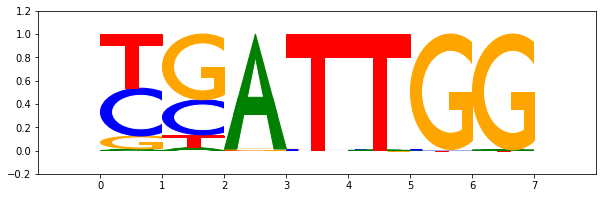

0_7


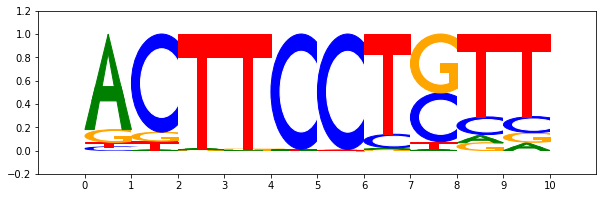

0_8


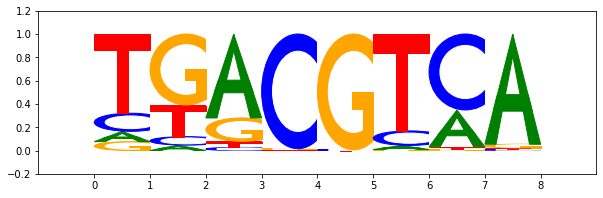

0_9


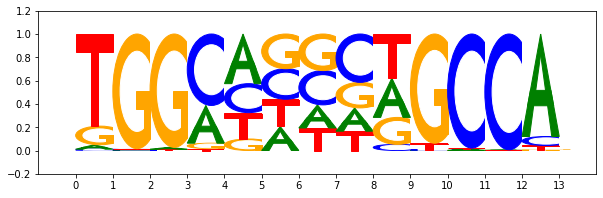

0_10


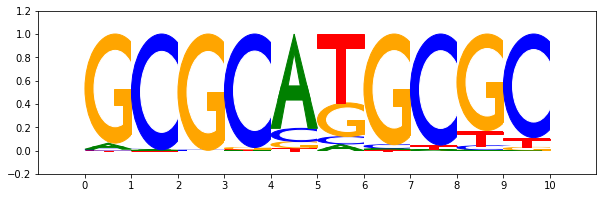

0_11


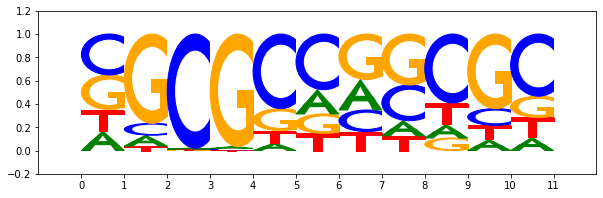

0_12


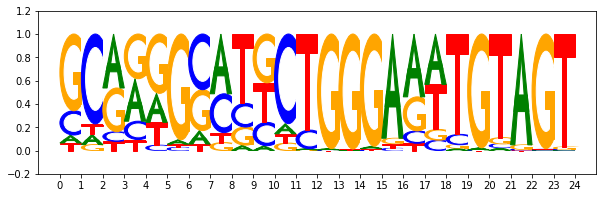

0_13


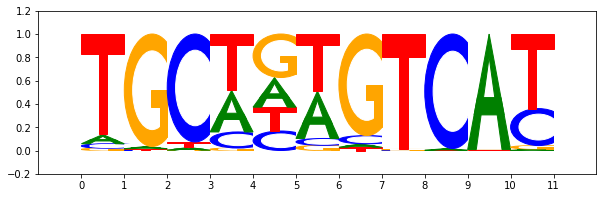

0_14


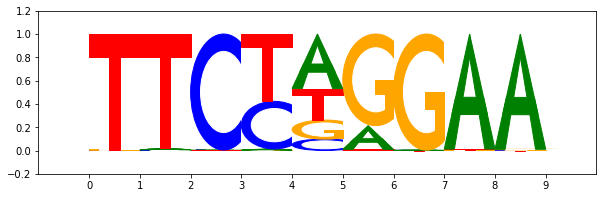

0_15


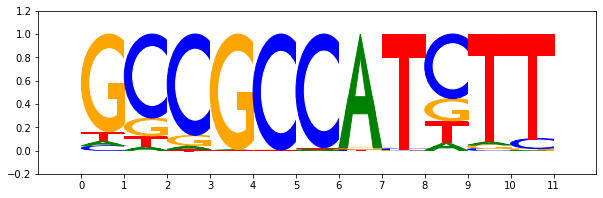

0_16


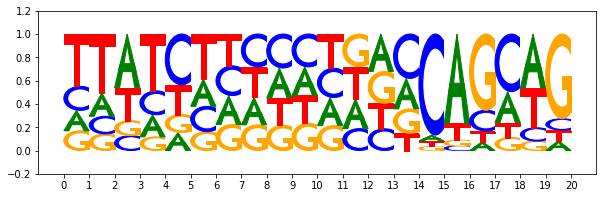

0_17


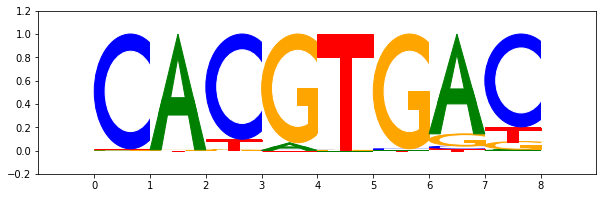

0_18


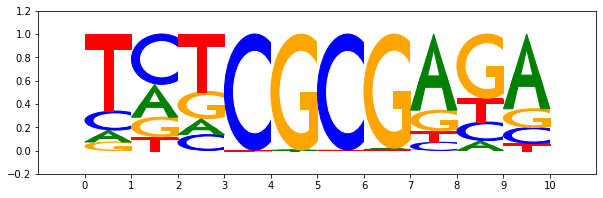

0_19


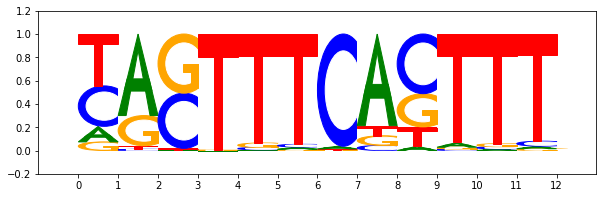

0_20


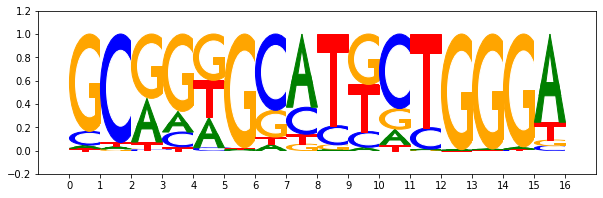

0_21


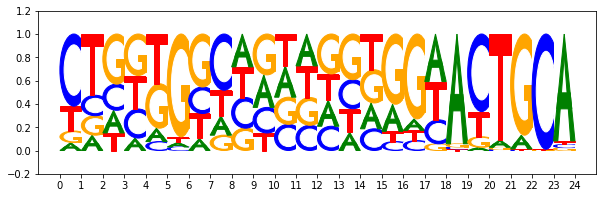

0_22


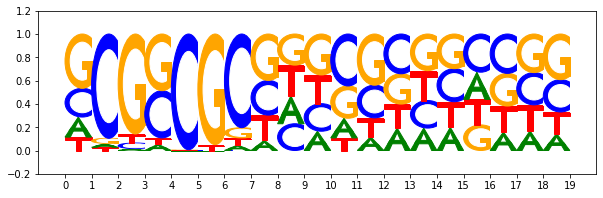

0_23


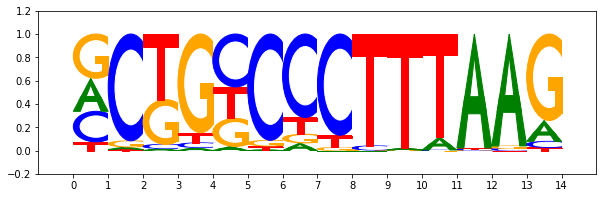

0_24


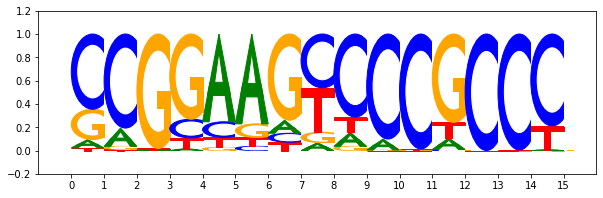

0_25


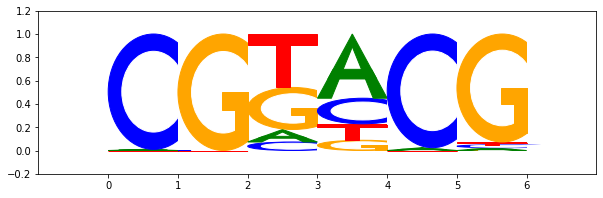

0_26


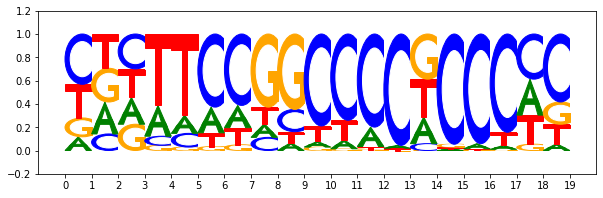

0_27


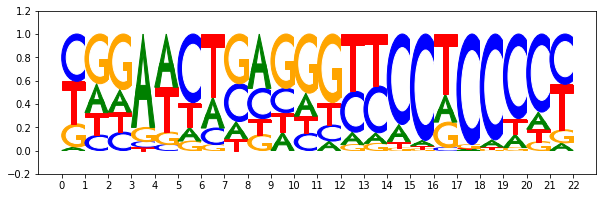

0_28


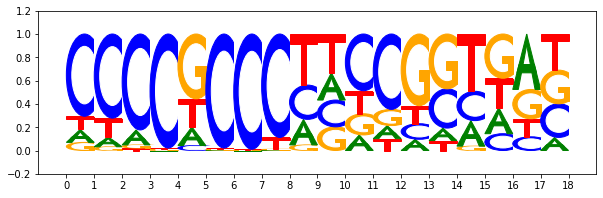

0_29


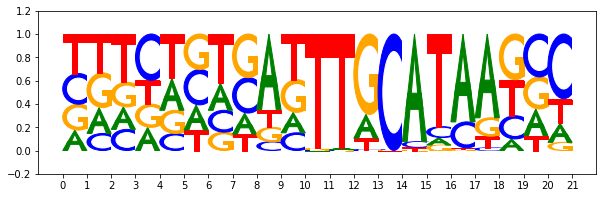

0_30


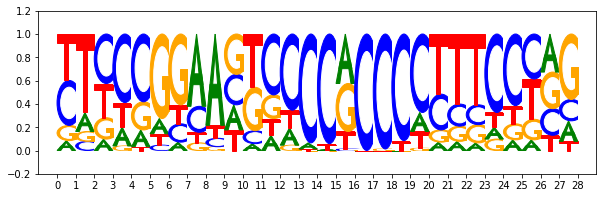

0_31


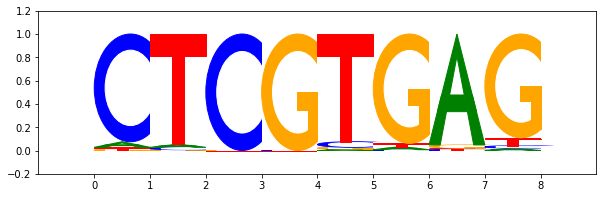

0_32


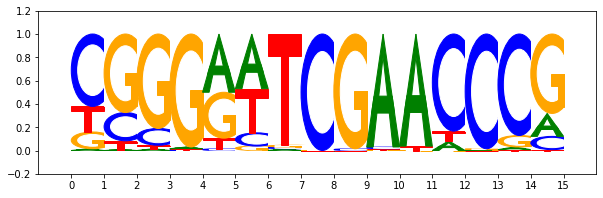

0_33


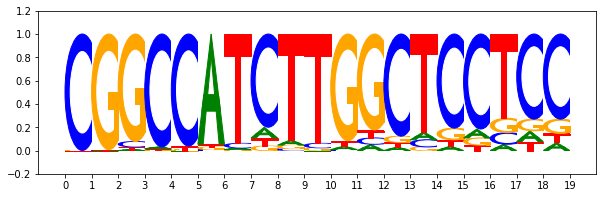

0_34


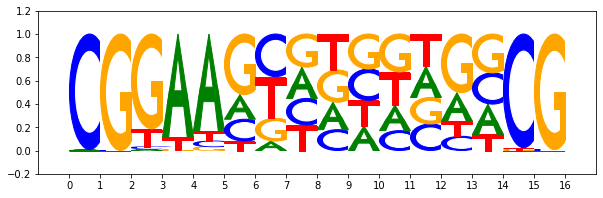

0_35


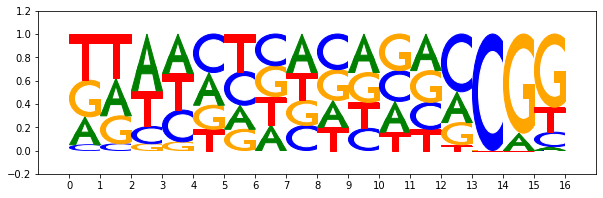

0_36


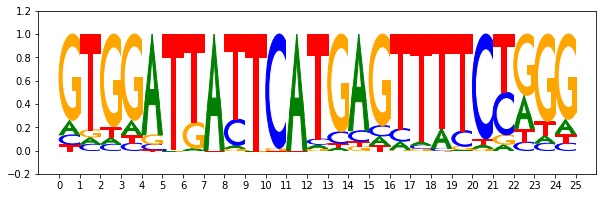

0_37


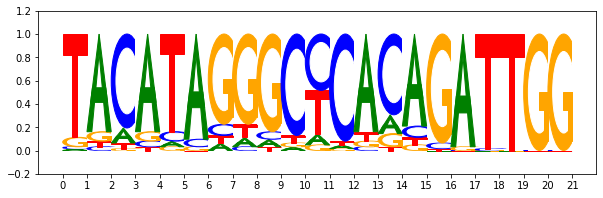

0_38


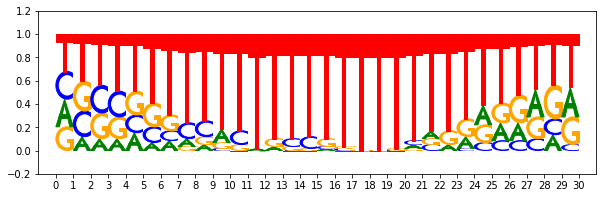

0_39


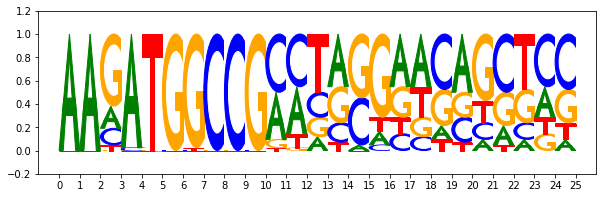

0_40


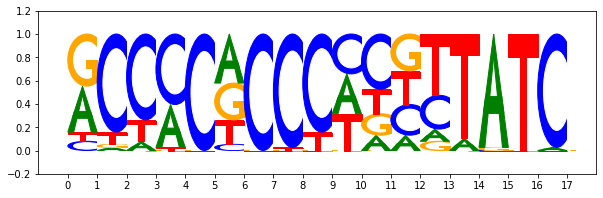

0_41


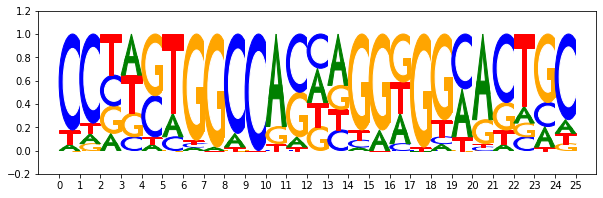

0_42


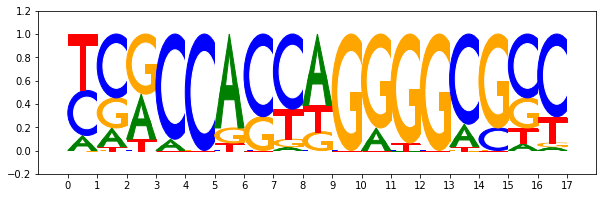

0_43


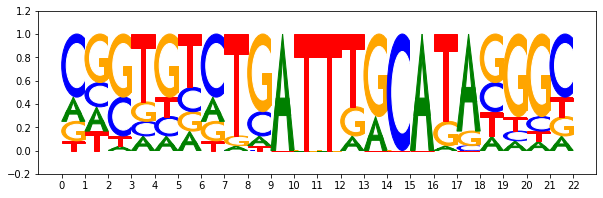

0_44


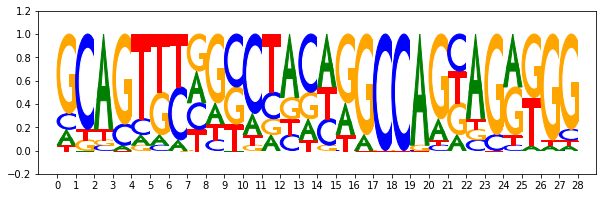

0_45


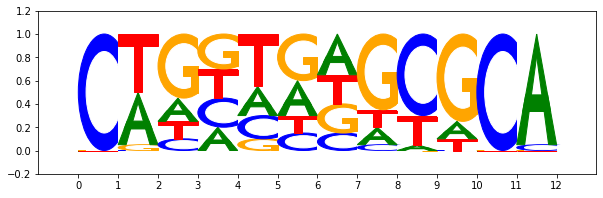

1_0


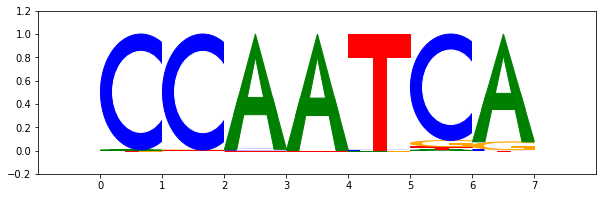

1_1


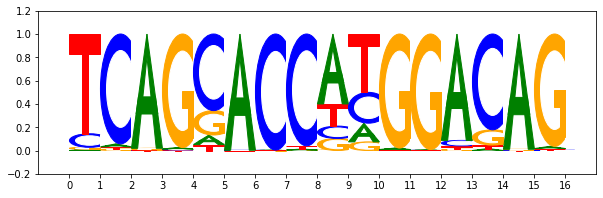

1_2


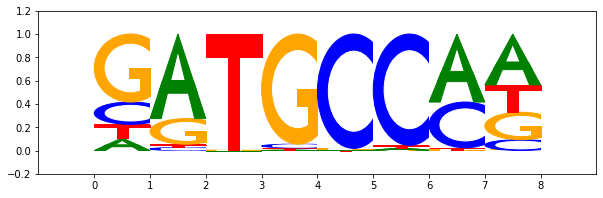

1_3


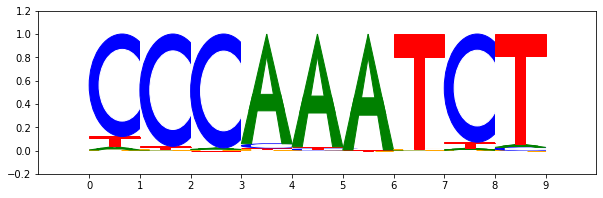

1_4


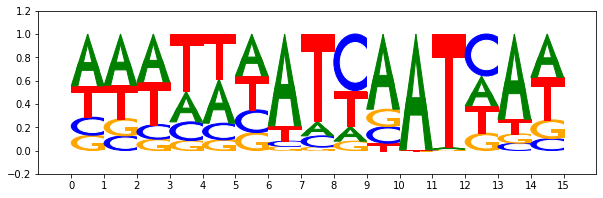

1_5


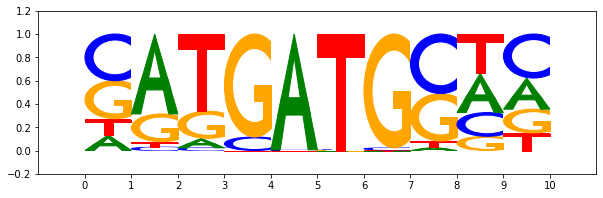

1_6


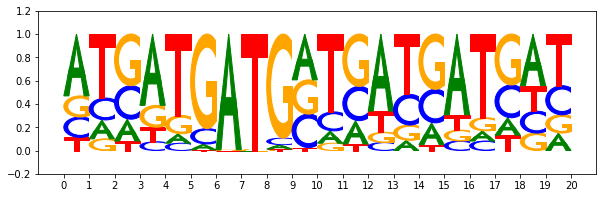

1_7


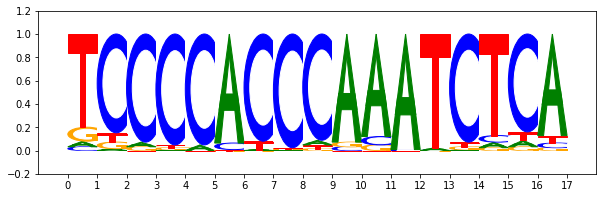

1_8


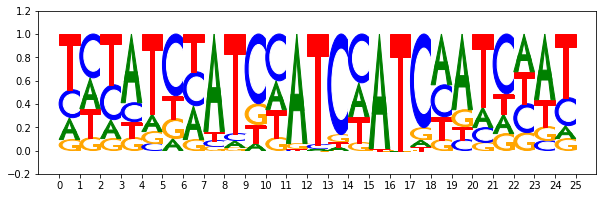

1_9


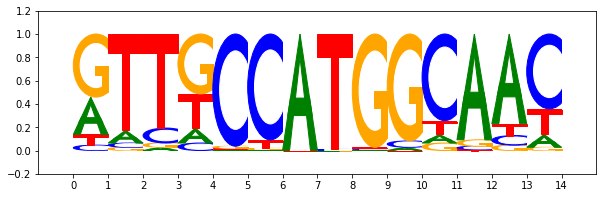

1_10


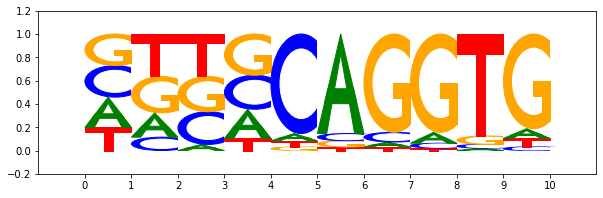

1_11


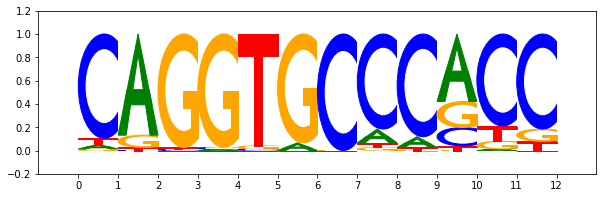

1_12


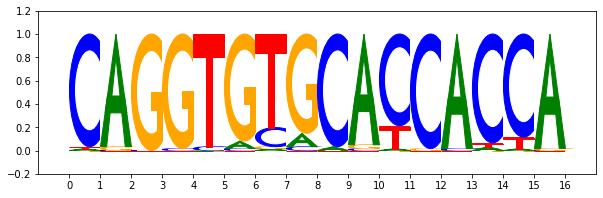

1_13


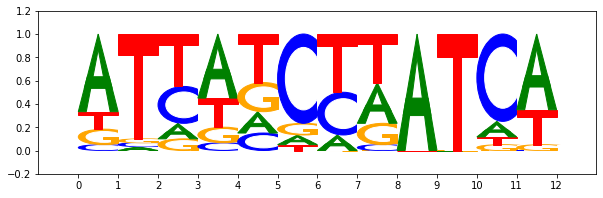

1_14


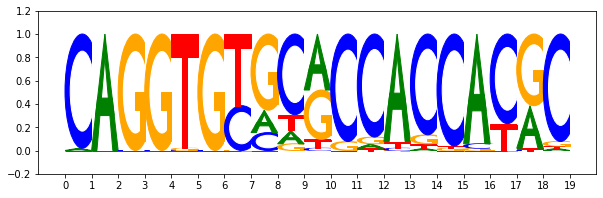

1_15


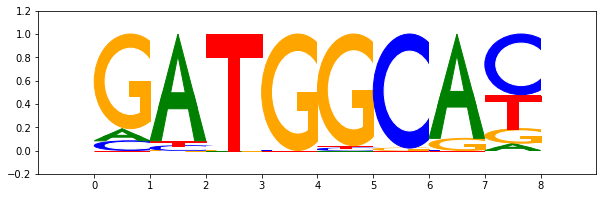

1_16


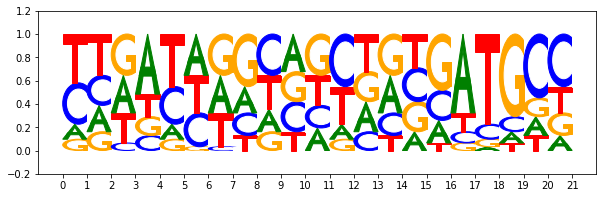

1_17


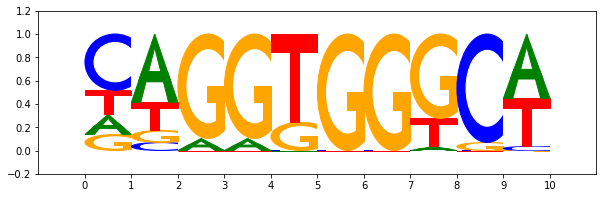

1_18


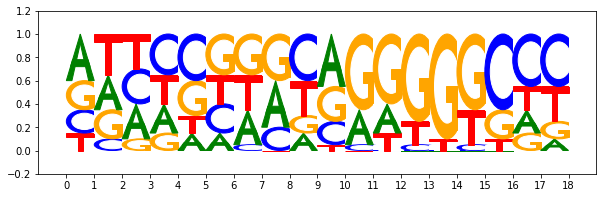

In [14]:
for key in ffms:
    print(key)
    _plot_weights(ffms[key].transpose())
